In [1]:
# Load packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
##from statsmodels.tools.sm_exceptions import ConvergenceWarning

# Load dataset
data = sm.datasets.get_rdataset("sleepstudy", "lme4").data

# Inspect dataset
print(data)

     Reaction  Days  Subject
0    249.5600     0      308
1    258.7047     1      308
2    250.8006     2      308
3    321.4398     3      308
4    356.8519     4      308
..        ...   ...      ...
175  329.6076     5      372
176  334.4818     6      372
177  343.2199     7      372
178  369.1417     8      372
179  364.1236     9      372

[180 rows x 3 columns]


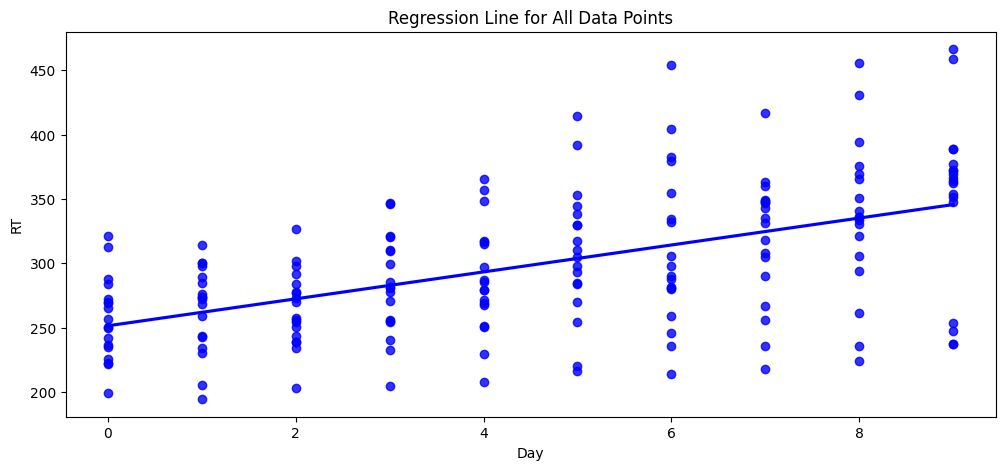

In [2]:
plt.figure(figsize=(12, 5))
sns.regplot(x='Days', y='Reaction', data=data, ci=None, color='blue')
plt.title("Regression Line for All Data Points")
plt.xlabel("Day")
plt.ylabel("RT")
plt.show()

<Figure size 1200x500 with 0 Axes>

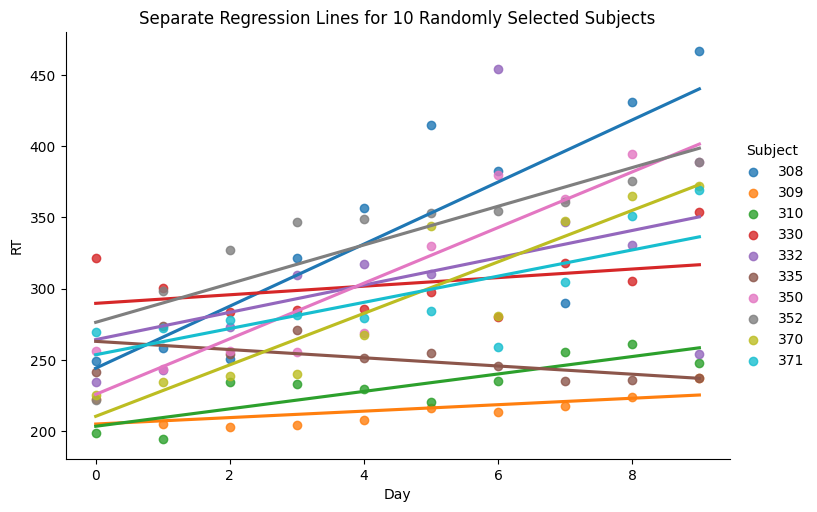

In [3]:
selected_subj = data['Subject'].drop_duplicates().sample(10, random_state=42)
data_subset = data[data['Subject'].isin(selected_subj)]

plt.figure(figsize=(12, 5))
sns.lmplot(x='Days', y='Reaction', hue='Subject', data=data_subset, ci=None, aspect=1.5)
plt.title("Separate Regression Lines for 10 Randomly Selected Subjects")
plt.xlabel("Day")
plt.ylabel("RT")
plt.show()

In [ ]:
import statsmodels.formula.api as smf
from statsmodels.datasets import get_rdataset

# Load the sleepstudy dataset
data = get_rdataset("sleepstudy", "lme4").data

# Model 1: Unconditional Model - Random Intercept Only
model1 = smf.mixedlm("Reaction ~ 1", data, groups=data["Subject"])
model1_fit = model1.fit(method="lbfgs")
print("Model 1 Summary - Unconditional Model (Random Intercept Only)")
print(model1_fit.summary())

# Model 2: Random Intercept Model - Includes Days as a fixed effect, but only random intercepts
model2 = smf.mixedlm("Reaction ~ Days", data, groups=data["Subject"])
model2_fit = model2.fit(method="lbfgs")
print("\nModel 2 Summary - Random Intercept Model with Level-1 Predictor (Days)")
print(model2_fit.summary())

# Model 3: Random Intercept and Random Slope Model - Includes Days with both random intercepts and slopes
model3 = smf.mixedlm("Reaction ~ Days", data, groups=data["Subject"], re_formula="~Days")
model3_fit = model3.fit(method="lbfgs")
print("\nModel 3 Summary - Random Intercept and Random Slope Model")
print(model3_fit.summary())



                 Mixed Linear Model Regression Results
Model:                   MixedLM      Dependent Variable:      Reaction 
No. Observations:        180          Method:                  REML     
No. Groups:              18           Scale:                   1772.8277
Min. group size:         10           Log-Likelihood:          inf      
Max. group size:         10           Converged:               Yes      
Mean group size:         10.0                                           
------------------------------------------------------------------------
          Coef.     Std.Err.     z    P>|z|     [0.025         0.975]   
------------------------------------------------------------------------
Intercept -0.000 297846087.024 -0.000 1.000 -583767603.503 583767603.503
Group Var  0.000                                                        


Model 2 Summary - Random Intercept Model with Level-1 Predictor (Days)
         Mixed Linear Model Regression Results
Model:             Mix

c:\Users\timdr\miniconda3\envs\psy111\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
c:\Users\timdr\miniconda3\envs\psy111\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2054: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\timdr\miniconda3\envs\psy111\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\timdr\miniconda3\envs\psy111\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2245: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\timdr\miniconda3\envs\psy111\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positiv

In [8]:
import numpy as np
import seaborn as sns
from scipy.stats import chi2
import statsmodels.formula.api as smf
import statsmodels.api as sm

df = sns.load_dataset('tips')
print(df)

# fit a null-model
formula = 'tip ~ 1'
null_model = smf.mixedlm(formula, data=df, groups=df.sex)
results = null_model.fit(reml=False)
print(results.summary())

def get_icc(results):
    '''get the Intraclass Correlation Coefficient (ICC)'''
    icc = results.cov_re / (results.cov_re + results.scale)
    
    return icc.values[0, 0]


def lr_test(formula, data, groups):
    '''perform likelihood ratio test of random-effects'''
    # fit null model in mixed linear model
    null_model = smf.mixedlm(formula, data=data, groups=groups)\
                    .fit(reml=False)
    # fit OLS model
    ols_model = smf.ols(formula, data=data)\
                   .fit()
    # get the LRT statistic and p-value
    lrt = np.abs(null_model.llf - ols_model.llf) * 2
    p = chi2.sf(lrt, 1)
    
    return (lrt, p)

# get the ICC and LRT results
icc = get_icc(results)
lrt, p = lr_test(formula, data=df, groups='day')

print(f'ICC = {icc:.4f}')
print(f'The LRT statistic: {lrt:.4f} (p = {p:.5})')

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]
         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: tip      
No. Observations: 244     Method:             ML       
No. Groups:       2       Scale:              1.9051   
Min. group size:  87      Log-Likelihood:     -424.9675
Max. group size:  157

c:\Users\timdr\miniconda3\envs\psy111\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\timdr\miniconda3\envs\psy111\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
c:\Users\timdr\miniconda3\envs\psy111\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\timdr\miniconda3\envs\psy111\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
c:\Users\timdr\miniconda3\envs\psy111\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge